# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


In [5]:
# Iniciando o estudo carregando a base de dados disponibilizado
df = pd.read_csv('estrutura.csv', sep=',', decimal=',')
df.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [4]:
plt.rc('figure', figsize=(5, 5))

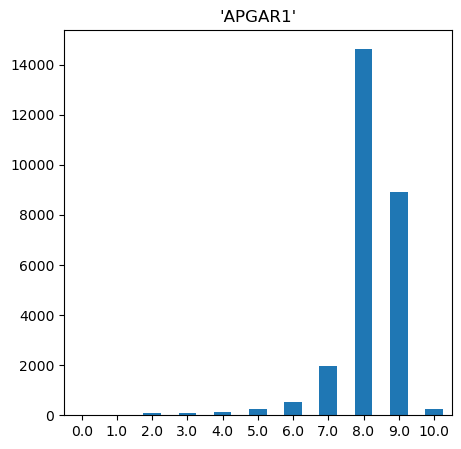

In [6]:
# Construindo um gráfico de barras para a variável APGAR1
df['APGAR1'].value_counts().sort_index().plot.bar()
plt.title(label="'APGAR1'")
plt.tick_params(axis='x', rotation=0)
plt.show()

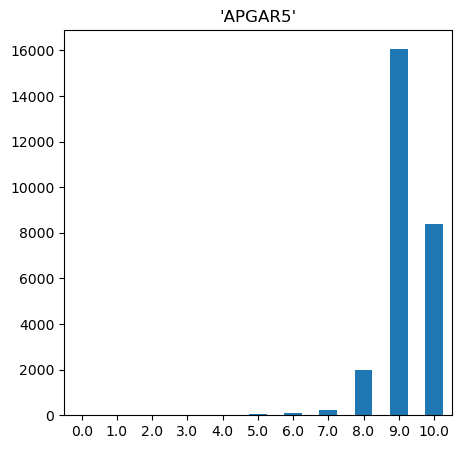

In [7]:
# Construindo um gráfico de barras para a variável APGAR5
df['APGAR5'].value_counts().sort_index().plot.bar()
plt.title(label="'APGAR5'")
plt.tick_params(axis='x', rotation=0)
plt.show()

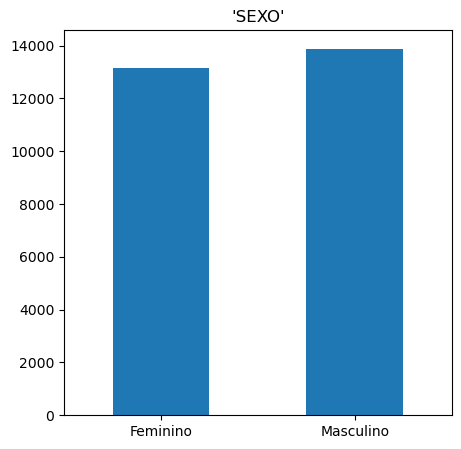

In [8]:
# Construindo um gráfico de barras para a variável SEXO
df['SEXO'].value_counts().sort_index().plot.bar()
plt.title(label="'SEXO'")
plt.tick_params(axis='x', rotation=0)
plt.show()

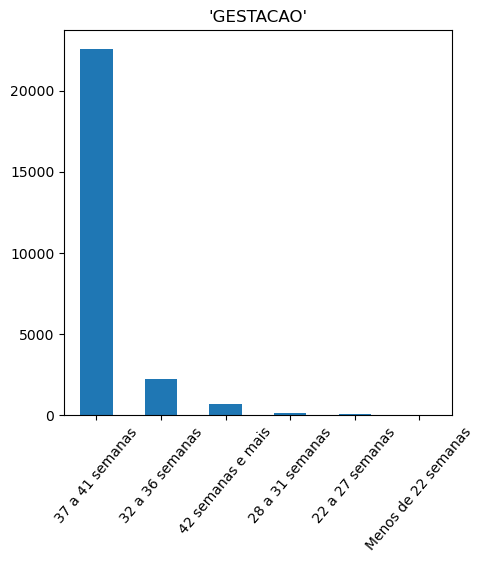

In [14]:
# Construindo um gráfico de barras para a variável GESTACAO
df['GESTACAO'].value_counts().plot.bar()
plt.title(label="'GESTACAO'")
plt.tick_params(axis='x', rotation=50)
plt.show()

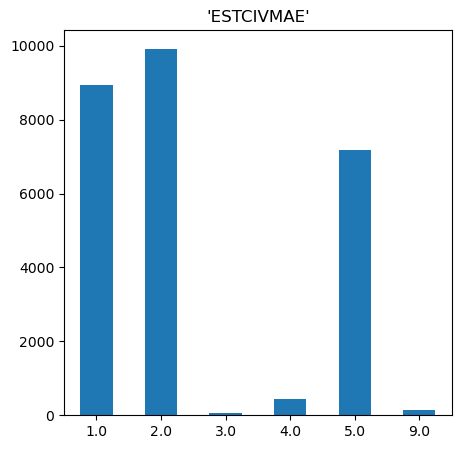

In [70]:
# Construindo um gráfico de barras para a variável ESTCIVMAE
df['ESTCIVMAE'].value_counts().sort_index().plot.bar()
plt.title(label="'ESTCIVMAE'")
plt.tick_params(axis='x', rotation=0)
plt.show()

In [33]:
# Traduzindo o eixo x para uma melhor avaliação
print('Legenda do eixo x:\n\n Estado civil: \n\n1: Solteira \n2: Casada \n3: Viuva \n4: Separado judicialmente/Divorciado \n5: União consensual \n9: Ignorado')


Legenda do eixo x:

 Estado civil: 

1: Solteira 
2: Casada 
3: Viuva 
4: Separado judicialmente/Divorciado 
5: União consensual 
9: Ignorado


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

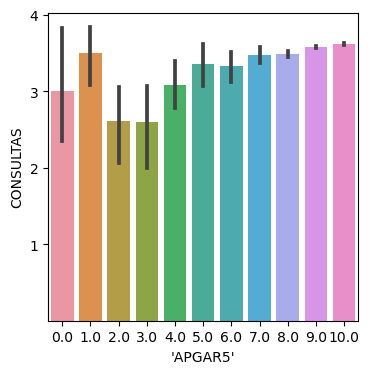

In [46]:
# Criando um gráfico com os eixos APGAR5 e CONSULTAS e a média do primeiro
plt.close('all')
plt.rc('figure', figsize=(4, 4))
ax = sns.barplot(data=df, x='APGAR5', y='CONSULTAS')

# Sabendo que o número de consultas apresentam 4 possibilidades (excluindo os missigns chamados de 'ignorado')
ax.set_yticks(ticks=[1, 2, 3, 4])
plt.xlabel(xlabel="'APGAR5'")

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

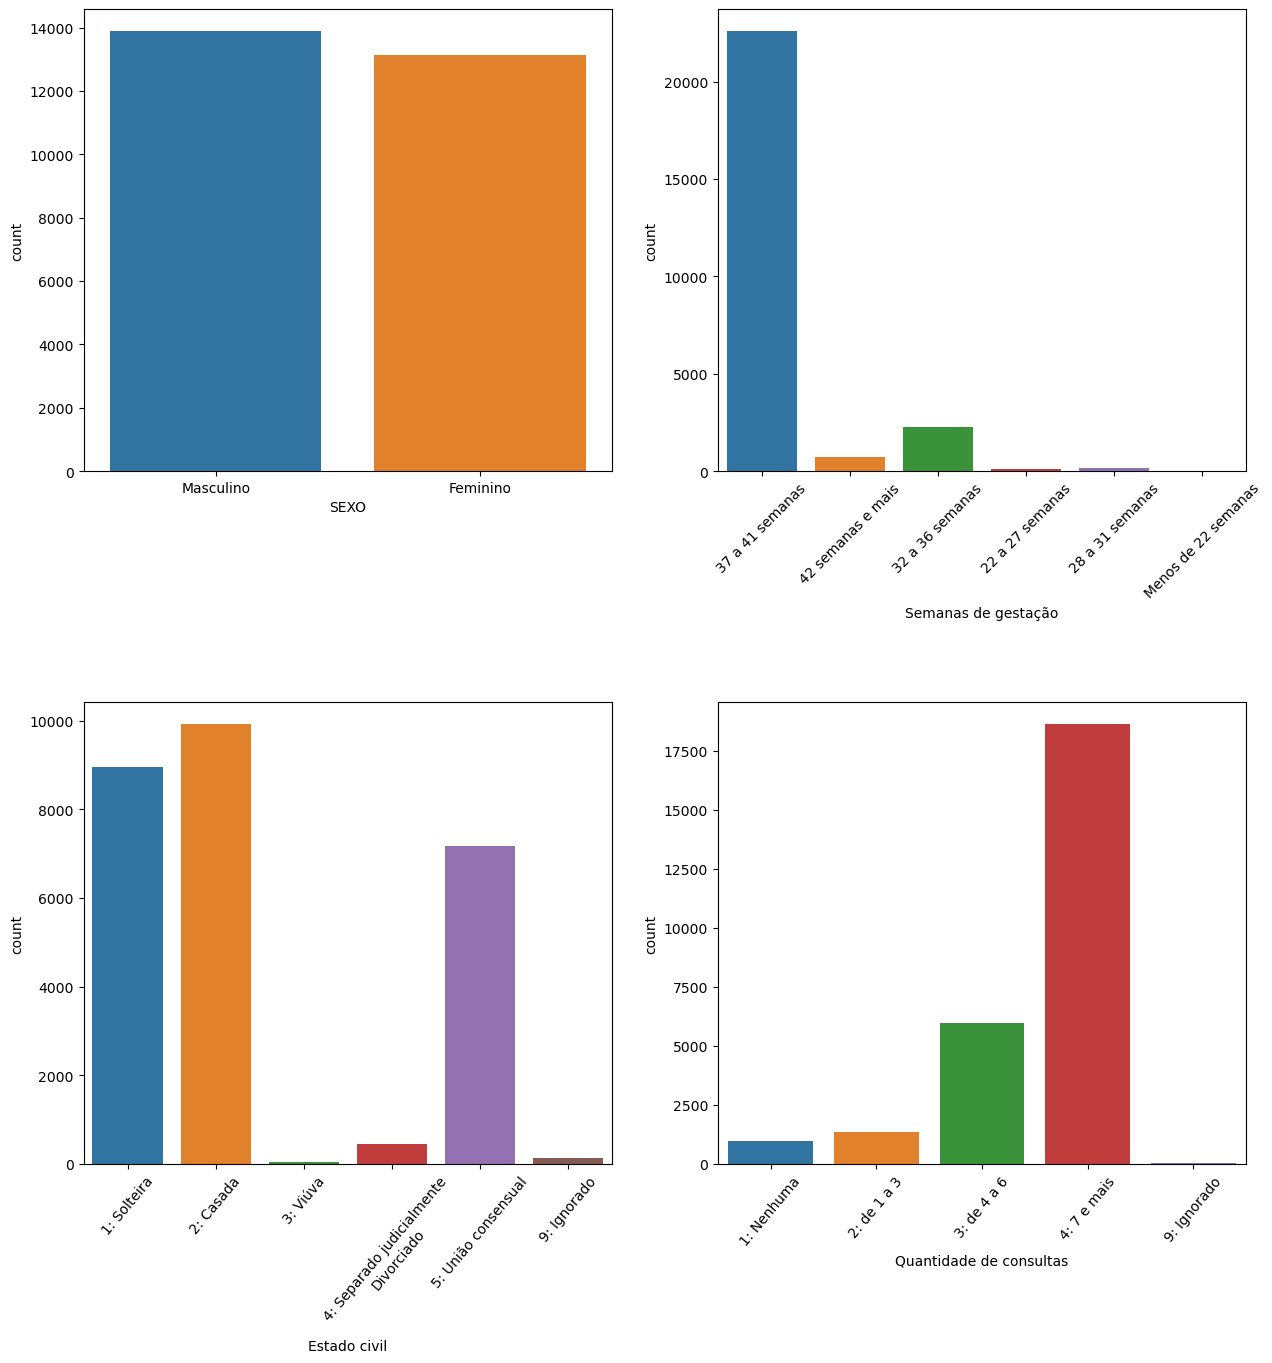

In [78]:
# Construindo primeiramente o tamanho dos gráficos 
plt.rc('figure', figsize=(15, 15))
fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5)

# Construindo o gráfico com a frequência do SEXO (Masculino e Feminino)
sex = sns.countplot(x='SEXO', data=df, ax=axes[0, 0])

# Construindo o gráfico com a frequência da GESTACAO 
gest = sns.countplot(x='GESTACAO', data=df, ax=axes[0, 1])
gest.set_xticklabels(labels=gest.get_xticklabels(), rotation=45)
gest.set_xlabel(xlabel='Semanas de gestação')

# Construindo o gráfico com a frequência da ESTCIVMAE
est = sns.countplot(x='ESTCIVMAE', data=df, ax=axes[1, 0])
est.set_xticklabels(labels=['1: Solteira', 
                            '2: Casada', 
                            '3: Viúva', 
                            '4: Separado judicialmente\nDivorciado', 
                            '5: União consensual',
                            '9: Ignorado'], rotation=50)
est.set_xlabel(xlabel='Estado civil')


# Construindo o gráfico com a frequência das CONSULTAS
con = sns.countplot(x='CONSULTAS', data=df, ax=axes[1, 1])
con.set_xticklabels(labels=['1: Nenhuma', 
                            '2: de 1 a 3', 
                            '3: de 4 a 6', 
                            '4: 7 e mais', 
                            '9: Ignorado'], rotation=50)
con.set_xlabel(xlabel='Quantidade de consultas')

plt.show()